In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Delete missing value

In [ ]:
# 행을 리스트로 구성
rows = [
    [1, 2, 3, np.nan, 5],
    [6, np.nan, 8, np.nan, 10],
    [11, 12, 13, 14, 15],
    [np.nan, np.nan, np.nan, np.nan, np.nan],
    [np.nan, np.nan, 23, np.nan, 25]
]

# 열 이름 리스트
columns = ['col1', 'col2', 'col3', 'col4', 'col5']

# 데이터프레임 생성
df = pd.DataFrame(rows, columns=columns, index=['row1', 'row2', 'row3', 'row4', 'row5'])

# 데이터프레임 출력
print(df)

      col1  col2  col3  col4  col5
row1   1.0   2.0   3.0   NaN   5.0
row2   6.0   NaN   8.0   NaN  10.0
row3  11.0  12.0  13.0  14.0  15.0
row4   NaN   NaN   NaN   NaN   NaN
row5   NaN   NaN  23.0   NaN  25.0


In [ ]:
new_df = df.dropna(axis=0, how='all')
print(new_df)

      col1  col2  col3  col4  col5
row1   1.0   2.0   3.0   NaN   5.0
row2   6.0   NaN   8.0   NaN  10.0
row3  11.0  12.0  13.0  14.0  15.0
row5   NaN   NaN  23.0   NaN  25.0


# 2. Mean imputation of missing value

In [ ]:
titanic_dir = '/content/drive/MyDrive/데이터 사이언스/DataScience_Assignment2/titanic.csv'

titanic = pd.read_csv(titanic_dir)

titanic[['Sex', 'Age']].head(20)

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [ ]:
# 성별에 따른 평균 나이
Age_mean_by_Sex = titanic.groupby('Sex')['Age'].mean()
print("성별에 따른 평균 나이:\n", Age_mean_by_Sex)

# Mean Imputation

titanic['Age'] = titanic.apply(
    lambda row: Age_mean_by_Sex[row['Sex']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)
Mean_Imputation_titanic = titanic


Mean_Imputation_titanic[['Sex', 'Age']].head(20)

성별에 따른 평균 나이:
 Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64


,Sex,Age
0,male,22.000000
1,female,38.000000
2,female,26.000000
3,female,35.000000
4,male,35.000000
5,male,30.726645
6,male,54.000000
7,male,2.000000
8,female,27.000000
9,female,14.000000


# 3. stock_market

array([[<Axes: title={'center': 'Dividend'}>,
        <Axes: title={'center': 'PBR'}>]], dtype=object)

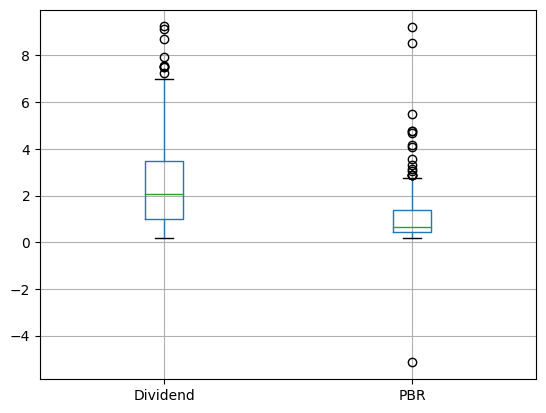

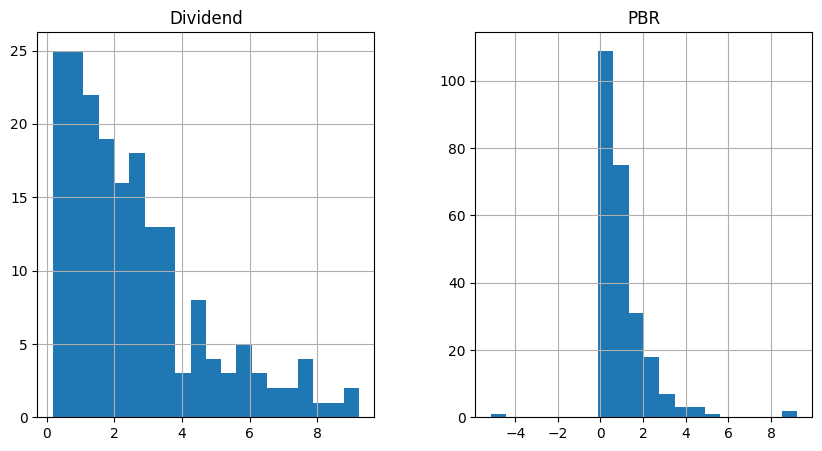

In [ ]:
stock_market_dir = '/content/drive/MyDrive/데이터 사이언스/DataScience_Assignment2/stock_market.csv'
df = pd.read_csv(stock_market_dir)
df.boxplot(column=['Dividend','PBR'])
original_df = df[['Dividend','PBR']]
original_df.hist(bins=20, figsize=(10,5))

###1) z-score 이상치 제거

array([[<Axes: title={'center': 'Dividend'}>,
        <Axes: title={'center': 'PBR'}>]], dtype=object)

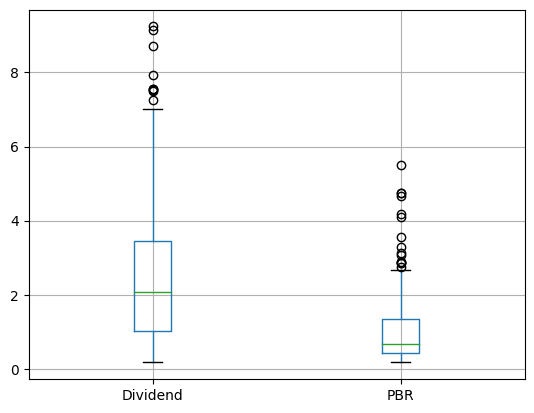

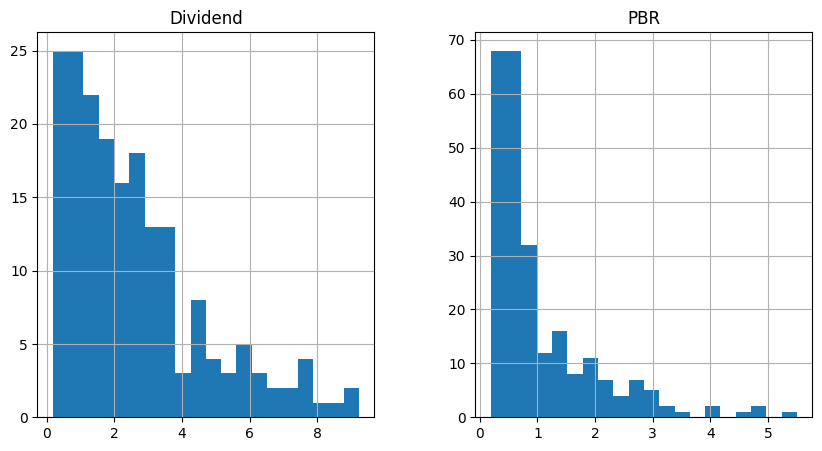

In [ ]:
z_scores = original_df.apply(lambda x: np.abs((x - x.mean()) / x.std()))

threshold = 5

outlier_indices = (z_scores < threshold).any(axis=1)

cleaned_df = original_df[outlier_indices]

cleaned_df.boxplot()
cleaned_df.hist(bins=20, figsize=(10,5))

### 2) IQR 이상치 처리 by min/max

In [ ]:
Q1 = df[['Dividend','PBR']].quantile(q=0.25)
Q3 = df[['Dividend','PBR']].quantile(q=0.75)
IQR = Q3-Q1
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
print(IQR)
print(lower_threshold)
print(upper_threshold)


Dividend    2.4500
PBR         0.9375
dtype: float64
Dividend   -2.66500
PBR        -0.97625
dtype: float64
Dividend    7.13500
PBR         2.77375
dtype: float64


original_df : 250
IQR_df : 173


<Axes: >

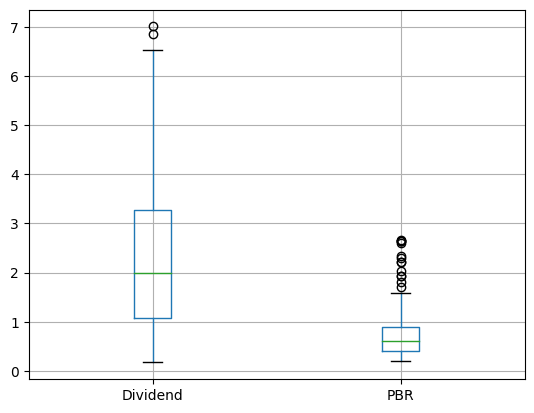

In [ ]:
IQR_df = df[(df['Dividend'] <= Q3['Dividend'] + 1.5 * IQR['Dividend']) & (df['Dividend'] >= Q1['Dividend'] - 1.5 * IQR['Dividend'])]
IQR_df = IQR_df[(IQR_df['PBR'] <= Q3['PBR'] + 1.5 * IQR['PBR']) & (IQR_df['PBR'] >= Q1['PBR'] - 1.5 * IQR['PBR'])]
IQR_df = IQR_df[['Dividend','PBR']]
print('original_df :', len(original_df))
print('IQR_df :', len(IQR_df))
IQR_df.boxplot()

Dividend min:  0.17
Dividend max:  9.24
PBR min:  -5.15
PBR max:  9.22
new df:


<Axes: >

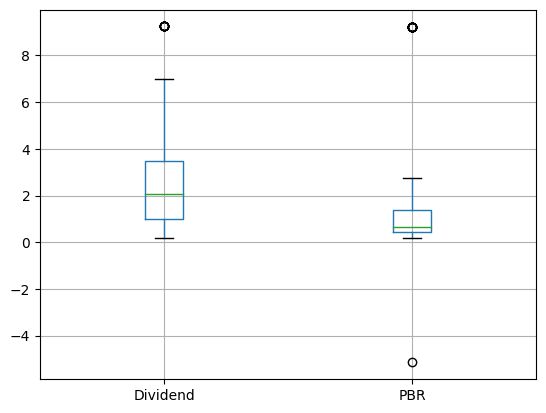

In [ ]:
# 이상치 대체를 위한 임계값 설정
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# 이상치를 min/max 값으로 대체
df['Dividend'] = np.where(df['Dividend'] < lower_threshold['Dividend'], df['Dividend'].min(), df['Dividend'])
df['Dividend'] = np.where(df['Dividend'] > upper_threshold['Dividend'], df['Dividend'].max(), df['Dividend'])
print('Dividend min: ',df['Dividend'].min())
print('Dividend max: ',df['Dividend'].max())


df['PBR'] = np.where(df['PBR'] < lower_threshold['PBR'], df['PBR'].min(), df['PBR'])
df['PBR'] = np.where(df['PBR'] > upper_threshold['PBR'], df['PBR'].max(), df['PBR'])
print('PBR min: ',df['PBR'].min())
print('PBR max: ',df['PBR'].max())


# 결과 확인
print("new df:")
df[['Dividend','PBR']].boxplot()

#4. Apple 주가 예측

2020년에 해당하는 데이터를 추출하고, 매주 평균 값으로 샘플링하여 ARMA 모델에 적용

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_squared_error

In [ ]:
# 2020 데이터 추출 및 매주 평균 값으로 샘플링
data = pd.read_csv('/content/drive/MyDrive/데이터 사이언스/DataScience_Assignment2/AAPL.csv')
data.Date = pd.to_datetime(data.Date)
data = data.set_index('Date')
print(data.index.is_unique)

data_2020 = data[data.index.year == 2020]  # 2020년 전체 데이터 추출
data_2020_weekly_mean = data_2020.resample('W').mean() # 매주 평균 값으로 샘플링
data_2020_weekly_mean['rtn'] = data_2020_weekly_mean['Close'].pct_change()
data_2020_weekly_mean['MA'] = data_2020_weekly_mean['Close'].rolling(2).mean()
data_2020_weekly_mean.head()

True


,Open,High,Low,Close,Adj Close,Volume,rtn,MA
Date,,,,,,,,
2020-01-05,74.173748,75.147500,73.961251,74.722500,73.628818,140901600.0,NaN,NaN
2020-01-12,75.431500,76.420000,75.092001,76.067000,74.953636,134018320.0,0.017993,75.394750
2020-01-19,78.502501,79.229001,77.997999,78.747499,77.594901,130411120.0,0.035239,77.407250
2020-01-26,79.621250,80.118748,79.154999,79.488127,78.324692,115921300.0,0.009405,79.117813
2020-02-02,79.429001,80.239499,78.274501,79.218001,78.058518,173346960.0,-0.003398,79.353064


<Axes: xlabel='Date'>

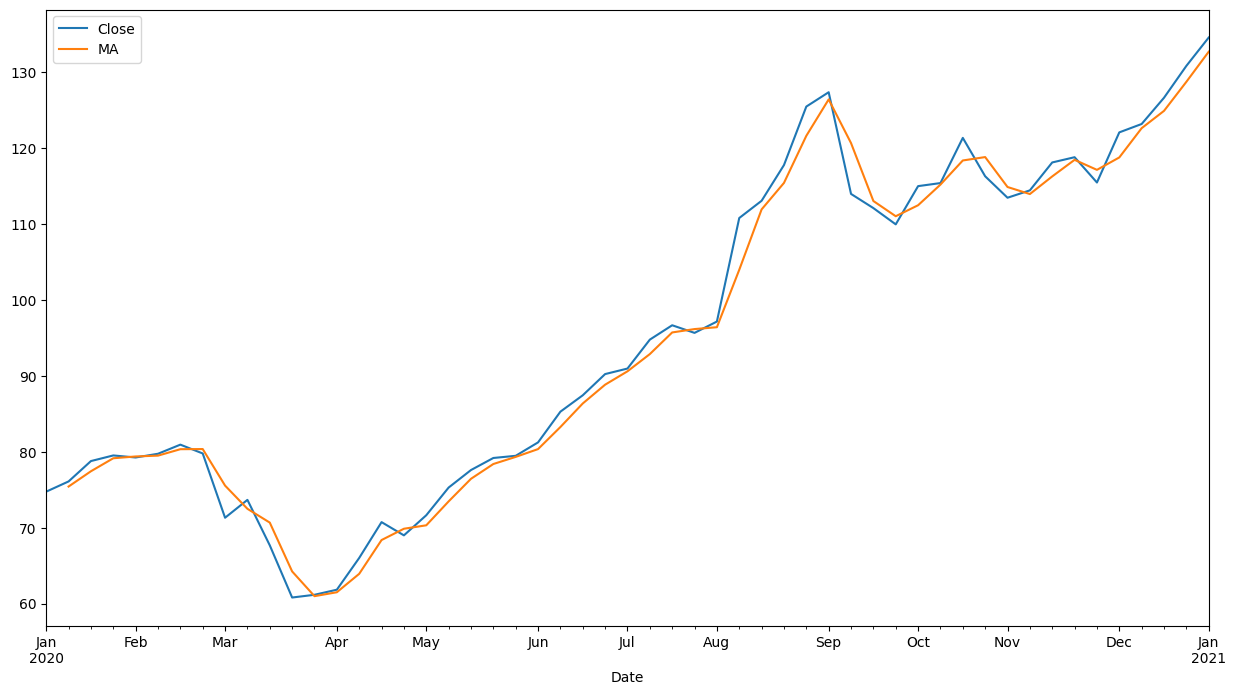

In [ ]:
data_2020_weekly_mean.iloc[:,[3,7]].plot(figsize=(15,8))

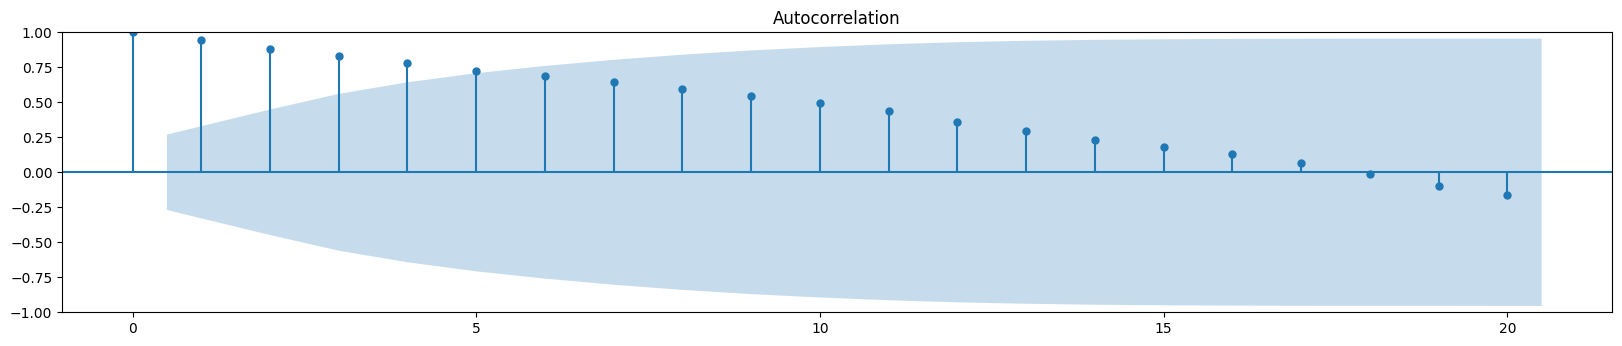

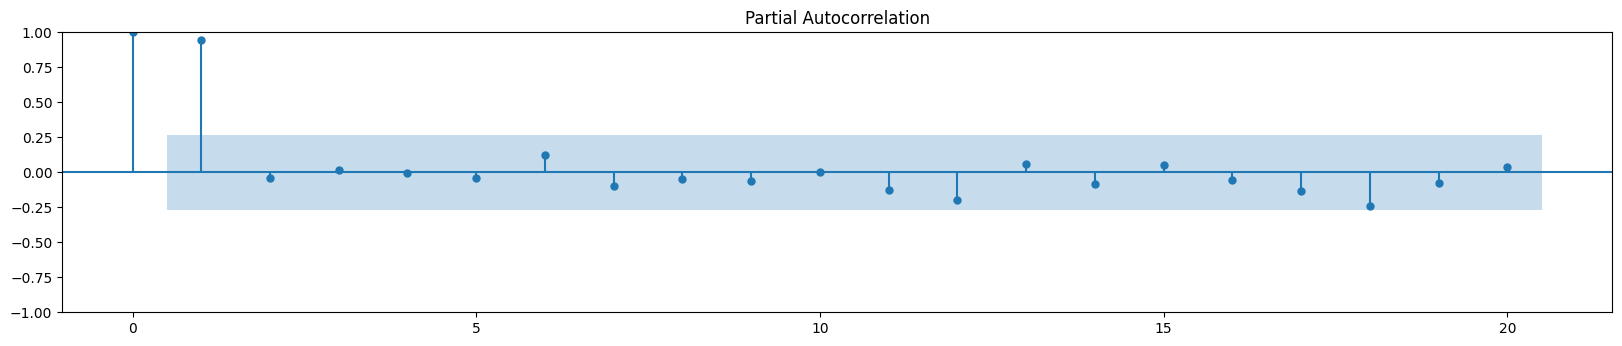

In [ ]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_2020_weekly_mean["Close"], lags=20, ax=ax1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_2020_weekly_mean["Close"], lags=20, ax=ax1)

In [ ]:
# SARIMAX 모델 파라미터 설정
order = (2, 1, 2)  # ARIMA 모델의 (p, d, q) 값
seasonal_order = (0, 0, 0, 0)  # Seasonal 모델의 (P, D, Q, s) 값

# SARIMAX 모델 피팅
model = SARIMAX(data_2020_weekly_mean['Close'], order=order)
results = model.fit()

# 모델 요약 정보 출력
print(results.summary())

# 예측 구간 설정
forecast_start_date = '2021-01-04'
forecast_end_date = '2021-1-31'

# 예측 구간에 해당하는 데이터 추출
forecast_data = data.loc[forecast_start_date:forecast_end_date]

# 예측 모델을 통한 예측 수행
forecast_results = model_fit.forecast(steps=len(forecast_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   53
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -148.394
Date:                Sat, 11 May 2024   AIC                            306.789
Time:                        15:52:58   BIC                            316.545
Sample:                    01-05-2020   HQIC                           310.529
                         - 01-03-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3637      1.310      1.041      0.298      -1.203       3.931
ar.L2         -0.3641      1.213     -0.300      0.764      -2.742       2.014
ma.L1         -1.1978      2.163     -0.554      0.5

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# 2021년 1월 데이터
data_2021_1 = data[(data.index.year == 2021) & (data.index.month == 1)]
data_2021_1.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.617111,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.207291,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.824318,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,130.117859,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.240906,105158200
2021-01-11,129.190002,130.169998,128.500000,128.979996,128.189743,100384500
2021-01-12,128.500000,129.690002,126.860001,128.800003,128.010864,91951100
2021-01-13,128.759995,131.449997,128.490005,130.889999,130.088043,88636800
2021-01-14,130.800003,131.000000,128.759995,128.910004,128.120163,90221800


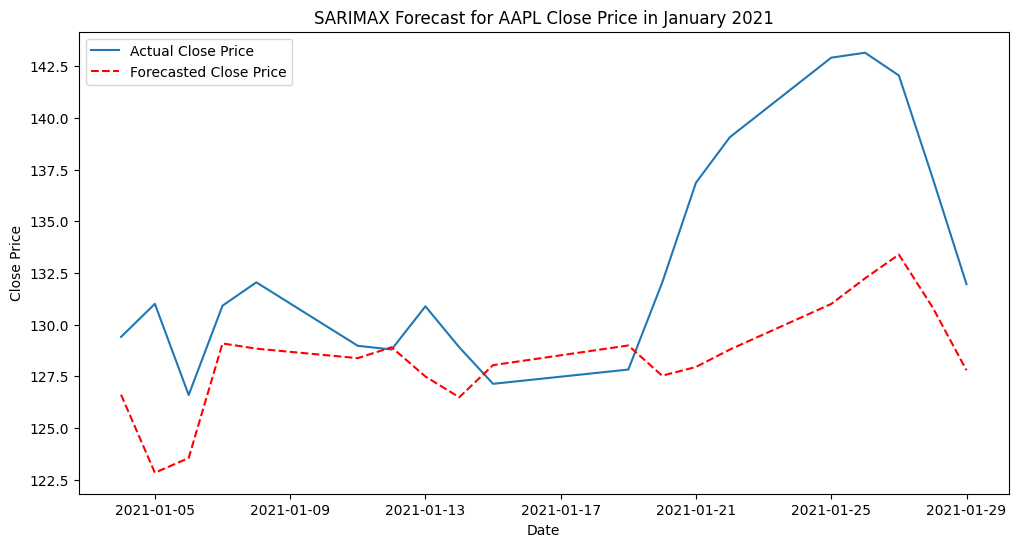

In [ ]:
# 예측 결과 시각화
plt.figure(figsize=(12, 6))
# plt.plot(data_2020_weekly_mean['Close'], label='Actual Close Price')
plt.plot(data_2021_1['Close'], label='Actual Close Price')
plt.plot(forecast_data.index, forecast_results, label='Forecasted Close Price', linestyle='--', color='red')
plt.title('SARIMAX Forecast for AAPL Close Price in January 2021')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### trash

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
from tqdm import tqdm

p = range(0,3)
d = range(1,2)
q = range(10,20)

pdq = list(itertools.product(p,d,q))

aic = []
params = []

with tqdm(total = len(pdq)) as pg:
    for i in pdq:
        pg.update(1)
        try:
            model = SARIMAX(data_2020_weekly_mean["Close"], order=(i))
            model_fit = model.fit()
            aic.append(round(model_fit.aic,2))
            params.append((i))
        except:
            continue

In [ ]:
optimal = [(params[i],j) for i,j in enumerate(aic) if j == min(aic)]
model_opt = ARIMA(data_2020_weekly_mean["Close"], order = optimal[0][0])
model_opt_fit = model_opt.fit()
model_opt_fit.summary()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# 데이터 로드 및 전처리
data = pd.read_csv('/content/drive/MyDrive/데이터 사이언스/DataScience_Assignment2/AAPL.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 2020년 데이터 추출
data_2020 = data['2020-01-01':'2020-12-31']
data_2020_weekly_mean = data_2020.resample('W').mean()

# ARIMA 모델 파라미터 찾기
p_values = range(0, 6)  # AR 파라미터 범위
d_values = range(0, 2)  # 차분(difference) 파라미터 범위
q_values = range(0, 6)  # MA 파라미터 범위
aic = []
params = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(data_2020_weekly_mean["Close"], order=(p, d, q))
                model_fit = model.fit()
                aic.append(model_fit.aic)
                params.append((p, d, q))
            except:
                continue

# 최적의 모델 파라미터 찾기
optimal = params[aic.index(min(aic))]

# 최적의 모델 생성 및 학습
model_opt = ARIMA(data_2020_weekly_mean["Close"], order=optimal)
model_opt_fit = model_opt.fit()

# 모델 요약 정보 출력
print(model_opt_fit.summary())

# 예측값 계산
forecast_start = '2021-01-03'
forecast_end = '2021-01-31'
forecast = model_opt_fit.predict(start=forecast_start, end=forecast_end)

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(data_2020_weekly_mean['Close'], label='Actual Close Price')
plt.plot(forecast, label='ARIMA Forecast', linestyle='--', color='red')
plt.title('ARIMA Forecast for AAPL Close Price in 2021-01')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

# 데이터 설정
data = np.array([3, 4, 5, 1, 2, 5])

# AR 모델
ar_model = ARIMA(data, order=(3, 0, 0))
ar_fit = ar_model.fit()
print("AR 모델 요약:")
print(ar_fit.summary())

# MA 모델
ma_model = ARIMA(data, order=(0, 0, 2))
ma_fit = ma_model.fit()
print("\nMA 모델 요약:")
print(ma_fit.summary())

# ARMA 모델
arma_model = ARIMA(data, order=(3, 0, 2))
arma_fit = arma_model.fit()
print("\nARMA 모델 요약:")
print(arma_fit.summary())

# 예측
ar_pred = ar_fit.forecast(steps=1)
ma_pred = ma_fit.forecast(steps=1)
arma_pred = arma_fit.forecast(steps=1)

print(f"\nAR 모델 예측: {ar_pred}")
print(f"MA 모델 예측: {ma_pred}")
print(f"ARMA 모델 예측: {arma_pred}")


AR 모델 요약:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(3, 0, 0)   Log Likelihood                  -7.185
Date:                Sun, 02 Jun 2024   AIC                             24.370
Time:                        14:08:08   BIC                             23.329
Sample:                             0   HQIC                            20.202
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1738      8.654      0.367      0.714     -13.789      20.136
ar.L1         -0.8970     23.589     -0.038      0.970     -47.131      45.336
ar.L2         -0.9607      9.106     -0.10